In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/excel1.xlsx")

In [2]:
df.drop("Career progress rank 2018", inplace=True, axis=1)
df.drop("Female students (%) 2019", inplace=True, axis=1)
df.drop("International course experience rank 2021", inplace=True, axis=1)

In [3]:
df['Threeyear average 2021'].fillna(0, inplace=True)
df['Threeyear average 2021'].replace('-', 0, inplace=True)
df['Threeyear average 2021'] = df['Threeyear average 2021'].astype(int)

In [4]:
df.columns

Index(['Rank', 'School Name', 'Careers service rank 2022',
       'Careers service rank 2021', 'Careers service rank 2020',
       'Careers service rank 2019', 'International board (%) 2022',
       'International board (%) 2021', 'International board (%) 2020',
       'International board (%) 2019', 'International board (%) 2018',
       'International course experience rank 2022',
       'International course experience rank 2020',
       'International course experience rank 2019', 'Threeyear average 2022',
       'Threeyear average 2021', 'Threeyear average 2020',
       'Threeyear average 2019', 'Threeyear average 2018',
       'Faculty with doctorates (%) 2022', 'Faculty with doctorates (%) 2021',
       'Faculty with doctorates (%) 2020', 'Faculty with doctorates (%) 2019',
       'Faculty with doctorates (%) 2018',
       'International work mobility rank 2022',
       'International work mobility rank 2021',
       'International work mobility rank 2020',
       'International

In [5]:
df.drop("Rank", inplace=True, axis=1)
df.drop("Rank in 2021", inplace=True, axis=1)
df.drop("Rank in 2020", inplace=True, axis=1)
df.drop("Rank in 2019", inplace=True, axis=1)
df.drop("Rank in 2018", inplace=True, axis=1)

In [6]:
df["rank_coded"] = df["Rank in 2022"].apply(lambda val: 1 if val <= 50 else 0)

In [8]:
df.columns

Index(['School Name', 'Careers service rank 2022', 'Careers service rank 2021',
       'Careers service rank 2020', 'Careers service rank 2019',
       'International board (%) 2022', 'International board (%) 2021',
       'International board (%) 2020', 'International board (%) 2019',
       'International board (%) 2018',
       'International course experience rank 2022',
       'International course experience rank 2020',
       'International course experience rank 2019', 'Threeyear average 2022',
       'Threeyear average 2021', 'Threeyear average 2020',
       'Threeyear average 2019', 'Threeyear average 2018',
       'Faculty with doctorates (%) 2022', 'Faculty with doctorates (%) 2021',
       'Faculty with doctorates (%) 2020', 'Faculty with doctorates (%) 2019',
       'Faculty with doctorates (%) 2018',
       'International work mobility rank 2022',
       'International work mobility rank 2021',
       'International work mobility rank 2020',
       'International work mo

In [10]:
X = df.drop(['School Name','Programme name','rank_coded'], axis=1).values
y= df["rank_coded"].values

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [23]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_num = SimpleImputer(strategy='mean')
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

# adaboost

In [14]:
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
adb_clf = AdaBoostClassifier(estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [25]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 1.00
accuracy score: 1.00


# GradientBoosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(loss='log_loss',  
    learning_rate=0.1,  
    n_estimators=100,  
    max_depth=3,  
    min_samples_split=2, 
    min_samples_leaf=1,  
    subsample=1.0,  
    random_state=42)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
gb_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(gb_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 1.00
accuracy score: 1.00


In [36]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0)  # 'verbose=0' to avoid too much logging
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
cat_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(cat_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 1.00
accuracy score: 1.00


# RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(rf_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 1.00
accuracy score: 0.96


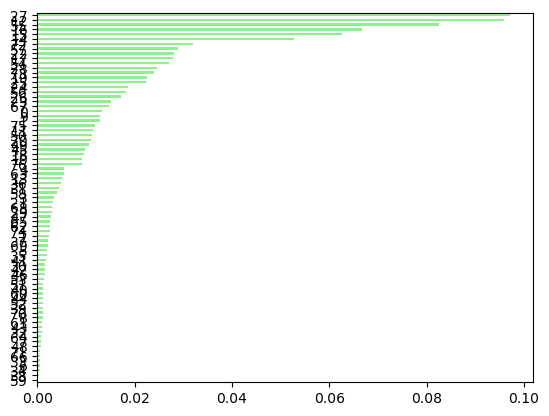

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
importances_rf = pd.Series(rf.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

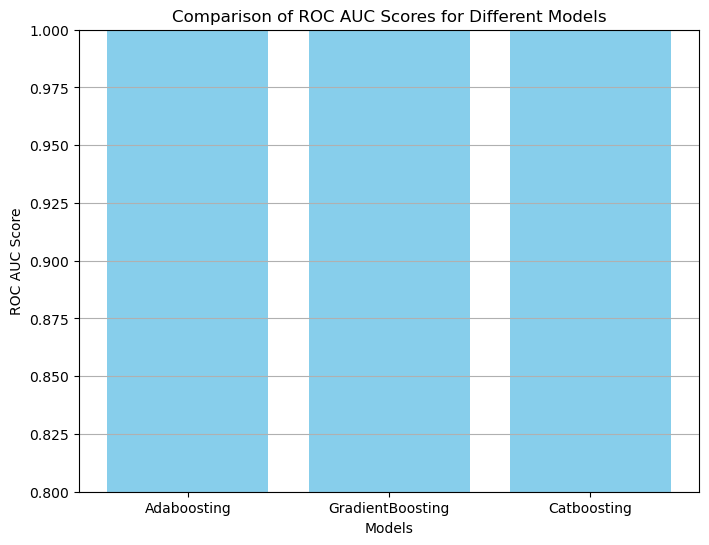

In [34]:
model_names = ['Adaboosting', 'GradientBoosting', 'Catboosting']  # Replace with your model names
roc_auc_scores = [adb_clf_roc_auc_score, gb_roc_auc_score, cat_roc_auc_score]
# Plotting ROC AUC scores for three models
plt.figure(figsize=(8, 6))
plt.bar(model_names, roc_auc_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of ROC AUC Scores for Different Models')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

Data and Model Issues: An ROC AUC score of 1 might indicate overfitting, especially if the model is evaluated on the same data it was trained on. This could mean the model has learned the training data too well and may not generalize well to new, unseen data.

Imbalanced Data: In cases of imbalanced datasets (where one class significantly outweighs the other), achieving a perfect score might be easier, but it's crucial to ensure that the model is not simply predicting the majority class all the time.

Evaluation on Different Datasets: It's important to assess the model's performance on different datasets (such as a separate validation or test set) to ensure that the high ROC AUC score is not just a result of chance or luck in a particular dataset.